In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
mktcap = pd.read_pickle("mktcap_vol_screnned_shift(1)_thresh0_ma.pickle")
price  = pd.read_pickle("ryu_new_price.pickle")

rtn = price.pct_change(fill_method=None) * np.sign(price)

## 코인 시총 순으로 이상한 값 있는지 찾아보기

In [63]:
mktcap[["OKB"]].loc["2019-10":"2020-03"]

,OKB
2019-10-01,42957616.0
2019-10-02,42251621.0
2019-10-03,42863283.0
2019-10-04,42469744.0
2019-10-05,42108607.0
...,...
2020-03-27,258788180.0
2020-03-28,246522746.0
2020-03-29,243567703.0
2020-03-30,246824262.0


XRP이상함

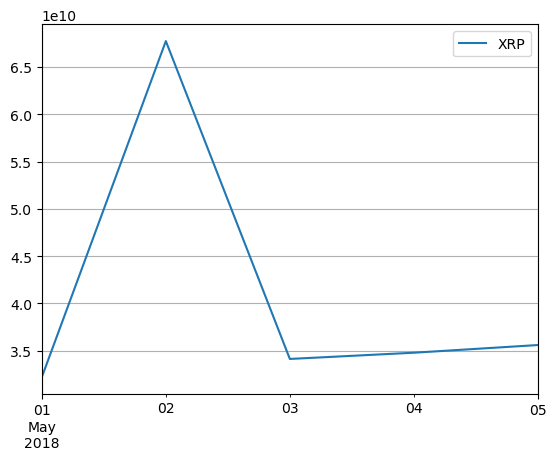

In [33]:
# Before # 2018년 5월 2일 데이터가 이상함
mktcap[["XRP"]].loc["2018-05":"2018-05-05"].plot()
plt.grid();

price의 변화를 이용해서 mktcap도 스무딩 해주겠음

In [35]:
t_0 = "2018-05-01"
t_1 = "2018-05-02" # 바꿔야할 날
coin = "XRP"

coin_rtn = rtn[[coin]].loc[t_1].values[0]

# 클리닝 이전 값
mktcap[["XRP"]].loc["2018-05-01":"2018-05-03"]

,XRP
2018-05-01,3.220932e+10
2018-05-02,6.775326e+10
2018-05-03,3.412774e+10


In [36]:
# 클리닝
mktcap[coin].loc[t_1] = mktcap[coin].loc[t_0]*(1 + coin_rtn)

In [71]:
# 클리닝 이후
mktcap[["XRP"]].loc["2018-05-01":"2018-05-03"]

,XRP
2018-05-01,3.220932e+10
2018-05-02,3.324257e+10
2018-05-03,3.412774e+10


In [72]:
mktcap.to_pickle("mktcap_vol_screnned_shift(1)_thresh0_ma.pickle")